In [3]:
import netCDF4 as nc4

# Get Wind Data

url = './data/wind_data/MERRA2_400.tavg3_3d_asm_Nv.20191210.nc4'
windData = nc4.Dataset(url)
windData

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Wed Dec 25 17:37:22 2019 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg3_3d_asm_Nv.20191210.nc4
    Filename: MERRA2_400.tavg3_3d_asm_Nv.20191210.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T3NVASM
    GranuleID: MERRA2_400.tavg3_3d_asm_Nv.20191210.nc4
    ProductionDateTime: Original file generated: Wed Dec 25 17:37:22 2019 GMT
    LongName: MERRA2 tavg3_3d_asm_Nv: 3d,3-Hourly,Time-Averaged,Model-Level,Assimilation,Assimilated Meteorological Fields
    Title: MERRA2 tavg3_3d_asm_Nv: 3d,3-Hourly,Time-Averaged,Model-Level,Assimilation,Assimilated Meteorological Fields
    Southernmost

### To derive the wind speed and direction, follow this documentation

https://disc.gsfc.nasa.gov/information/data-in-action?title=Derive%20Wind%20Speed%20and%20Direction%20With%20MERRA-2%20Wind%20Components

To see function for wind direction:
https://sgichuki.github.io/Atmo/

East Australia coordinate:
140.433,-46.758,163.46,-16.348

In [4]:
#Get Wind Data
windLat = windData.variables['lat'][:]
windLon = windData.variables['lon'][:]
windLev = windData.variables['lev'][:]
windTime = windData.variables['time']
windU = windData.variables['U'][:] # eastward wind
windV = windData.variables['V'][:] # northward wind

print(windTime)
print(windLev)
print(windLat)
print(windLon)

windLat.shape, windLon.shape, windTime.shape, windU.shape, windV.shape

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: minutes since 2019-12-10 01:30:00
    time_increment: 30000
    begin_date: 20191210
    begin_time: 13000
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (8,)
filling on, default _FillValue of -2147483647 used
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.]
[-9.0000000e+01 -8.9500000e+01 -8.9000000e+01 -8.8500000e+01
 -8.8000000e+01 -8.7500000e+01 -8.7000000e+01 -8.6500000e+01
 -8.6000000e+01 -8.5500000e+01 -8.5000000e+01 -8.4500000e+01
 -8.4000000e+01 -8.3500000e+01 -8.3000000e+01 -8.2500000e+01
 -8.2000000e+01 -8.1500000e+01 -8.1000000e+01 -8.0500000e+01
 -8.0000000e+01 -7

((361,), (576,), (8,), (8, 72, 361, 576), (8, 72, 361, 576))

From the wind data, we will use area of:
140.624, -46, 157.5, -16

quote from Attiya and Jones, 2022:
"In Richmond the daily maximum average hourly concentration of particulate matter (PM10) was 848.9 μg/m3 at 07:00 UTC on 26 November 2019 and 785 μg/m3 at 07:00 UTC on 12 December 2019. On 10 December 2019, the highest PM10 recorded in the Sydney region was 961.5 μg/m3 in St Marys at 01:00 UTC, while the highest PM2.5 concentration was 714.6 μg/m3 in Oakdale in southwest Sydney at 18:00 UTC."

"The 532 nm total attenuated backscatter signal in Figure 7 detected
the existence of an aerosol layer at an elevation of 14 km lying above cirrus stratocumulus"



In [5]:
windLevIndex = 0
targetCoordinates = 140.624, -46, 157.5, -16
targetCoordinates

(140.624, -46, 157.5, -16)

74.46919


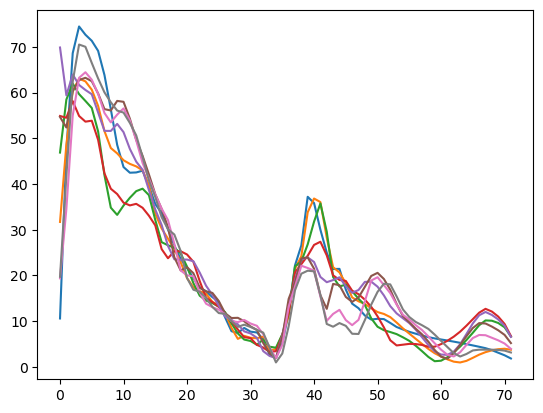

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use coordinate around Sydney
sydneyLat = -33.5
sydneyLon = 151.25

latIndex = np.where(windLat == sydneyLat)[0][0]
lonIndex = np.where(windLon == sydneyLon)[0][0]

# get wind value for all lev
for time in range(len(windU)):
    hourWindU = [windU[time, lev, latIndex, lonIndex] for lev in range(len(windLev))]
    hourWindV = [windV[time, lev, latIndex, lonIndex] for lev in range(len(windLev))]
    windVec = np.sqrt(np.square(hourWindU) + np.square(hourWindV))
    if (time == 0): print(max(windVec))
    plt.plot(windVec)
    
# Plot the data of wind to see the diffrence between lev
plt.show()



In [7]:
# WindTimeConvert = nc4.num2date(windTime, windTime.units)
# WindTimeConvert

In [8]:
urlAod = './data//aod_data/MERRA2_400.inst3_2d_gas_Nx.20191210.nc4'
aodData = nc4.Dataset(urlAod)
aodData

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Wed Dec 25 16:50:51 2019 GMT
    Comment: GMAO filename: d5124_m2_jan10.inst3_2d_gas_Nx.20191210.nc4
    Filename: MERRA2_400.inst3_2d_gas_Nx.20191210.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2I3NXGAS
    GranuleID: MERRA2_400.inst3_2d_gas_Nx.20191210.nc4
    ProductionDateTime: Original file generated: Wed Dec 25 16:50:51 2019 GMT
    LongName: MERRA2 inst3_2d_gas_Nx: 2d,3-Hourly,Instantaneous,Single-Level,Assimilation,Aerosol Optical Depth Analysis
    Title: MERRA2 inst3_2d_gas_Nx: 2d,3-Hourly,Instantaneous,Single-Level,Assimilation,Aerosol Optical Depth Analysis
    SouthernmostLati

In [9]:
aodTime = aodData.variables['time']
aodLon = aodData.variables['lon'][:]
aodLat = aodData.variables['lat'][:]

# Getting AOD data
aod = aodData.variables['AODANA'][:]

aodTime.shape, aodLat.shape, aodLon.shape, aod.shape


((8,), (361,), (576,), (8, 361, 576))

In [10]:
# # Create wind pairs coordinate
# windPairs = np.array(np.meshgrid(windLat, windLon)).T.reshape(-1, 2)

# # Create aod coordinate pairs
# aodPairs = np.array(np.meshgrid(aodLat, aodLon)).T.reshape(-1, 2)


# print(f"Wind coordinate pairs: start = {windPairs[0]}; end = {windPairs[-1]}")
# print(f"Aod coordinate pairs: start = {aodPairs[0]}; end = {aodPairs[-1]}")

# # To check the coordinates are the same
# print(f"Check if coordinates of wind and AOD is the same: {(windPairs == aodPairs).all()}")

# # Since the same, we can save this coordinate pairs as the world pairs
# worldPairs = windPairs

# find target coordinate in aodLat and aodLon
targetLatIndex = np.where((aodLat > targetCoordinates[1]) & (aodLat < targetCoordinates[3]))[0]
targetLat = np.array([windLat[i] for i in targetLatIndex])

targetLonIndex = np.where((aodLon > targetCoordinates[1]) & (aodLon < targetCoordinates[3]))[0]
targetLon = np.array([windLon[i] for i in targetLonIndex])

targetPairsIndex = np.array(np.meshgrid(targetLatIndex, targetLonIndex)).T.reshape(-1, 2)
targetCoordinatPairs = np.array([(windLat[coordinateIndex[0]], windLon[coordinateIndex[1]]) for coordinateIndex in targetPairsIndex])

targetCoordinatPairs.shape

(2832, 2)

## Referance about how to count wind value from windU and windV

This the math referance on how to calculate wind speed and direction:

http://colaweb.gmu.edu/dev/clim301/lectures/wind/wind-uv#:~:text=ws%20%3D%20sqrt(u2%2Bv2)&text=This%20will%20require%20the%20inverse,arctan(v%2Fu).

In [50]:
# Get wind value across time at surface level for a day

windVal = np.empty((len(windU), targetCoordinatPairs.shape[0]), dtype=object)
for time in range(len(windU)):
    windUTarget = [windU[time, 0, targetIndex[0], targetIndex[1]] for targetIndex in targetPairsIndex]
    windVTarget = [windV[time, 0, targetIndex[0], targetIndex[1]] for targetIndex in targetPairsIndex]
    
    # Get wind direction in degree
    windDirection = np.arctan2(windVTarget, windUTarget) * 180 / np.pi
    
    # create tuple consist of wind speed and direction pair
    windSpeedDirection = list(zip(np.sqrt(np.square(windUTarget) + np.square(windVTarget)), windDirection))
    
    windVal[time] = windSpeedDirection

windVal[0]

array([(np.float32(42.633106), np.float32(147.99362)),
       (np.float32(41.56997), np.float32(147.45714)),
       (np.float32(40.550938), np.float32(147.04811)), ...,
       (np.float32(36.8476), np.float32(166.25925)),
       (np.float32(36.53245), np.float32(166.21722)),
       (np.float32(36.26547), np.float32(166.0724))], dtype=object)

In [19]:
# Get aod value across time for the first day

aodVal = np.empty((8, 2832))
for time in range(len(aodTime)):
    aodVal[time] = [aod[time, targetIndex[0], targetIndex[1]] for targetIndex in targetPairsIndex]
    
aodVal

array([[0.10476532, 0.1080557 , 0.12594965, ..., 0.05111147, 0.05540025,
        0.05540854],
       [0.08335422, 0.08877587, 0.0942583 , ..., 0.05506739, 0.05486738,
        0.05264045],
       [0.08296632, 0.08051354, 0.08360522, ..., 0.05290909, 0.05112861,
        0.04741638],
       ...,
       [0.12540129, 0.14215419, 0.15207994, ..., 0.05947108, 0.05618454,
        0.06391499],
       [0.16921468, 0.16657925, 0.16636209, ..., 0.05006051, 0.05299816,
        0.05978748],
       [0.12586853, 0.13855568, 0.15556797, ..., 0.05039557, 0.05301676,
        0.05401278]])

In [25]:
# Change lat and lon coordinate to UK coordinate system

from pyproj import CRS, Transformer

# lat lon coordinate system code is 4326 (data format: lat, lon)
crs_4326 = CRS.from_epsg(4326)

# UK coordinate system code is 26917 (data format: easting, northing)
crs_26917 = CRS.from_epsg(26917)

transformer = Transformer.from_crs(crs_4326, crs_26917)

transformedPairs = np.array([transformer.transform(coordinate[0], coordinate[1]) for coordinate in targetCoordinatPairs])

transformedPairs.shape

(2832, 2)

In [26]:
# Import advectionGP module

from advectionGP.models.mesh_adr2d_model import AdjointAdvectionDiffusionReaction2DModel as Model #Model module builds basic parts of the advection diffusion PDE problem, combines other classes into full model
from advectionGP.models.mfmodels import MeshFreeAdjointAdvectionDiffusionModel as MFModel
from advectionGP.sensors import FixedSensorModel #Builds sensor arrays to generate data for foward model or to generate observations for comparison
from advectionGP.kernels import EQ #Generates exponentiated quadratic kernel approximation
from advectionGP.wind import WindSimple1d #Wind model

In [27]:
# Establsih parameters

k_0 = 0.01 #Diffusion coefficient
noiseSD = 0.05 #Observation noise
N_feat=300 # number of features used to approximate ground truth GP
boundary = ([0,0,0],[10,10,10])# corners of the grid - in units of space
kForward = EQ(2, 2.0) # generate EQ kernel arguments are lengthscale and variance
res = [300,50,50] # grid size for time, x and y

N_feat = 1000 #Number of features used to infer the source
kInverse = EQ(2, 2.0) # Initiate kernel for inverse problem
# mInfer = Model(resolution=res,boundary=boundary,N_feat=N_feat,noiseSD=noiseSD,kernel=kInverse,sensormodel=sensors,windmodel=windmodel,k_0=k_0,R=0) #Initiate new model for inference
# mInfer.computeModelRegressors() # Compute regressor matrix
# meanZ, covZ = mInfer.computeZDistribution(yTrain) # Infers z vector mean and covariance using regressor matrix
# sourceInfer = mInfer.computeSourceFromPhi(meanZ) # Generates estimated source using mean of the inferred distribution
# concInfer=mInfer.computeResponse(sourceInfer) # Generates estimated concentration from inferred source